# Libraries

In [80]:
import numpy as np
import pandas as pd

In [81]:
df = pd.read_csv("Task1.csv")

In [82]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [83]:
df.shape

(12684, 26)

# Data Pre-Processing

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [85]:
#preprocessing

df.isnull().sum()
    


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [86]:
# car remove

df.drop(['car'],axis=1,inplace=True)



In [87]:
df.isnull().sum()

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

In [88]:
df.shape

(12684, 25)

In [89]:
# drop null values
df.dropna(inplace=True)

In [90]:
df.shape

(12079, 25)

In [91]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

# Encoding

In [92]:
# cateogrical column name using label encoder 
 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for cols in df.columns:
    if df[cols].dtype == 'object':
        df[cols] = le.fit_transform(df[cols])

df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,1,0,2,55,2,4,0,1,0,2,...,3,1,1,3,1,0,0,0,1,1
23,1,1,2,80,0,2,1,1,0,2,...,3,1,1,3,1,0,0,0,1,0
24,1,1,2,80,0,0,0,1,0,2,...,3,1,1,3,1,0,0,0,1,1
25,1,1,2,80,0,1,1,1,0,2,...,3,1,1,3,1,1,0,0,1,0
26,1,1,2,80,2,2,0,1,0,2,...,3,1,1,3,1,0,0,0,1,0


# Classification Model

In [93]:
#logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

x = df.drop(['Y'],axis=1)

y = df['Y']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# apply decision tree

from sklearn.tree import DecisionTreeClassifier


clf = DecisionTreeClassifier(random_state=42)

clf.fit(x_train,y_train)
 

y_pred = clf.predict(x_test)

accuracy_score(y_test,y_pred)

 

0.6837748344370861

In [94]:
# print classification report
 
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.65      0.64      1057
           1       0.72      0.71      0.72      1359

    accuracy                           0.68      2416
   macro avg       0.68      0.68      0.68      2416
weighted avg       0.68      0.68      0.68      2416



In [95]:
print('sensitivity', recall_score(y_test,y_pred))
print('specificity', recall_score(y_test,y_pred,pos_label=0))


sensitivity 0.7071376011773363
specificity 0.6537369914853358
confusion matrix [[691 366]
 [398 961]]


In [100]:
print('confusion matrix', confusion_matrix(y_test,y_pred))

confusion matrix [[691 366]
 [398 961]]


In [97]:
# apply k-fold cross validation
 
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = clf, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 68.33 %
Standard Deviation: 1.39 %


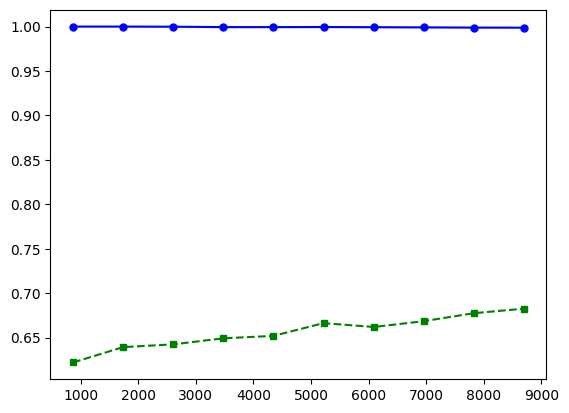

In [98]:
# accuraccy curve

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from matplotlib import pyplot as plt


train_sizes, train_scores, test_scores = learning_curve(estimator = clf,
                                                         X = x_train,
                                                            y = y_train,
                                                            train_sizes = np.linspace(0.1, 1.0, 10),
                                                            cv = 10,
                                                            n_jobs = -1)

train_mean = np.mean(train_scores, axis = 1)

train_std = np.std(train_scores, axis = 1)

test_mean = np.mean(test_scores, axis = 1)

test_std = np.std(test_scores, axis = 1)


plt.plot(train_sizes, train_mean, color = 'blue', marker = 'o', markersize = 5, label = 'training accuracy')

plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')

plt.plot(train_sizes, test_mean, color = 'green', linestyle = '--', marker = 's', markersize = 5, label = 'validation accuracy')


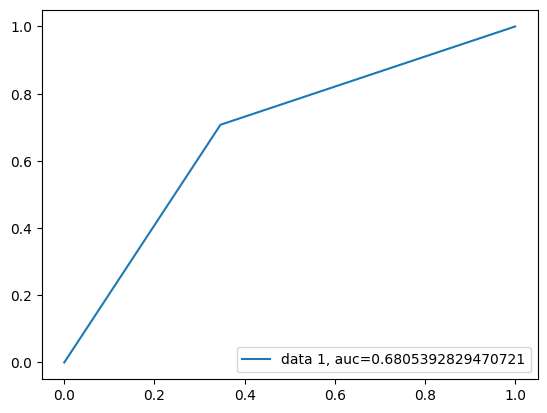

In [99]:
# roc curve

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


y_pred_proba = clf.predict_proba(x_test)[::,1]


fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))

plt.legend(loc=4)

plt.show()
    

            